# Lecture IX

Modelling and Machine Learning of Dynamical System in Julia

## Project Info 


### What's the Project?
* To pass this course, we ask you to work on a project

* Work alone or in pairs (pairs are expected to do a slightly more extensive project)
* Work on a project that extends one of the topics from the lectures or picks up a new topic with the methods that we talked about, e.g. exploring the dynamics of an extended version of one of the models we introduced in the lectures or combining one of the models with a machine learning method 
* We approve / hand out topics, if you have an idea what you want to do send us an email (we also do still have some interesting ML topics in the last part of the lecture after Christmas), we also have suggestions if you don't have an idea
* Sign up for the exam in the TUM system, if you are an external student, please let us know by mail

### Handing in the Project`

* The project is comprised of a 
    * Short report 4-5 pages that introduces your topic, gives a short summary on the research history of the topic, the method/model that you use, and a short discussion of your results
    * Code: Invite us to a Git repository with the code base. Write your projects as scripts/notebooks and a Julia package that accompany it. The package should fulfill the usual Julia package requirements and include CI/CD
    
* We offer an (optional) inital review of your project with short feedback, 7th March, we strongly recommend that you use this oppurtunity 
* Hand in the completed project by 21nd March 
* If you cannot make these deadlines for a good reason, please inform us about it early! 
* Indicate if you want to have a grade or just pass the course

## Recap: Finite Differences PDEs 

* Partial Differential Equations are equations of the type: 

$$\begin{align}
\frac{\partial}{\partial t}u(x_1,x_2,...,t) &= f(u(x_1,x_2,...,t),\frac{\partial}{\partial x_1}u(x_1,x_2,...,t),\\ &\frac{\partial}{\partial x_2}u(x_1,x_2,...,t),...,\frac{\partial^2}{\partial x_1^2}u(x_1,x_2,...,t),...)
\end{align}$$

* Partial derivatives with respect to multiple variables occur. Often this is time and some spatial coordinates
* They are often used to describe spatiotemporal dynamics, e.g. diffusion, advection, ...
* Last time we've seen one approach how to solve partial differential equation with the help of the finite differences approach: $\frac{\partial u(x)}{\partial x}(x_i) \approx \frac{u(x_i + \Delta x) - u(x_i - \Delta x)}{2\Delta x} = \frac{u(x_{i+1}) - u(x_{i-1})}{2\Delta x}$
* We've seen how we turn a PDE into ODE system in matrix form, e.g.: 

$$\begin{align}\frac{\partial}{\partial x}\begin{pmatrix}u_1\\u_2\\u_3\\...\\u_{10}\end{pmatrix} &\rightarrow \frac{1}{2\Delta x}\begin{pmatrix}0 & 1 & 0 & 0 & 0 &  0 & 0 & 0 & 0 & -1\\-1 & 0 & 1 & 0 & 0 &  0 & 0 & 0 & 0 & 0\\0 & -1 & 0 & 1 & 0 &  0 & 0 & 0 & 0 & 0\\...\\1 & 0 & 0 & 0 & 0 &  0 & 0 & 0 & -1 & 0\end{pmatrix} \begin{pmatrix}u_1\\u_2\\u_3\\...\\u_{10}\end{pmatrix} \\ &\rightarrow  
\begin{pmatrix}\frac{1}{2\Delta x} (u_2 - u_{10}) \\ \frac{1}{2\Delta x}(u_3 - u_1) \\ \frac{1}{2\Delta x}(u_4 - u_2) \\ ... \\  \frac{1}{2\Delta x}(u_1 - u_9)\end{pmatrix} 
\end{align}$$

* We always have to watch that the boundary conditions are correctly fulfilled by these matrices! 

* Then, we used this to turn the heat equation into a system of ordinary differential equation that we solved in matrix form: 

$$\begin{align} 
   \frac{\partial T}{\partial t} = D^2  \left(\frac{\partial^2}{\partial x^2} + \frac{\partial^2}{\partial y^2}\right) T \quad\rightarrow\quad \frac{\partial T}{\partial t} = D^2  (\Delta \cdot T) \end{align}$$
   
   where $\Delta$ now is the discritized Laplace operator in matrix form, a sparse matrix with entries along some of its diagonals
   
* Today we will use this to solve a 1D-Energy Balance model

## Recap: Energy Balance Models

### One-Dimensional EBMs 

* So far we treated Earth in EBMs just as a point with a uniform temperature
* One-Dimensional EBMs make the temperature latitude dependent 
* The basic ansatz is 

$$\begin{align} 
C(\phi) \frac{\partial T}{\partial t} &= E_{in}(\phi,T) - E_{out}(\phi,T) + D(\phi,T,\partial T/\partial \phi, \partial^2 T/\partial \phi^2)
\end{align}$$ 

* $C(\phi)$ is the latitude dependent heat capacity 
* There are in- and outgoing raditation/energy 
* And a diffusion term $D$, the diffusion term includes partial derivatives with respect to the latitude 
* This makes these models *partial differential equations*

## Ghil-Sellers 1D Energy Balance Model 

* Based on these papers: 
    * [Sellers: "A Global Climatic Model Based on the Energy Balance of the Earth-Atmosphere System", 1969](https://journals.ametsoc.org/view/journals/apme/8/3/1520-0450_1969_008_0392_agcmbo_2_0_co_2.xml)
    * [Ghil: "Climate Stability for a Sellers-Type Model", 1976](https://journals.ametsoc.org/view/journals/atsc/33/1/1520-0469_1976_033_0003_csfast_2_0_co_2.xml)
    * [Bodai et al: "Global instability in the Ghil-Sellers model", 2014](https://arxiv.org/abs/1402.3269)
    
* The model is also of the form 
$$\begin{align} 
C(x) \frac{\partial T}{\partial t} &= R_{i}(\phi,T) - R_{o}(x,T) + D(x,T,\partial T/\partial x, \partial^2 T/\partial x^2)
\end{align}$$ 
* $x$ is the dimensionless rescaled latitude: $x = 2\phi/\pi$
* With Neumann boundary conditions: $\frac{\partial T}{\partial x}(-1,t) = \frac{\partial T}{\partial x}(1,t) = 0\forall t$ 
* It is a PDE, and it includes a lot of physical parameters that are derived from observational data to incorporate the influence of unresolved processes in this model
* The model was used to study the stability of the energy balance and espacially in the 70s also to possibly study conditions for ice ages, glaciation
* An interesting paragraph from Ghils paper from 1976: 
    * "Thus, to explain physical ice ages, one has to consider pertubations in the parameters apearing in Eq.(4'). Such pertubations would presumably be caused by physical mechanisms not included in the model. The most likely candidate for such a role is $\mu$. Indeed, many ice ages theories rely heavily on a change, however small, in the amount of solar radiation [...]. Some attribute the decrease in radiation to changes in the parameters of the motion of planets (Milanković, 1969), [...] others to volcaninc activity. There also has been concern about a possible climatic catastrophe being imminent because of the increase in quantity of industrial pollutants in the atmsophere (Rasool and Schneider, 1971)"
         

### What do we need to do? 

* Set up a discretization and derivative finite difference scheme 
* Initialize the parameters of the model 
* Implement the incoming radiation $R_{i}(\phi,T)$
* Implement the outcoming radiation $R_{o}(\phi,T)$
* Implement the diffusion $D$
* Make sure the boundary conditions are fulfilled


### Discretization 

* We discretize $x$ into a grid of $N$ points
* This is the same `struct` as in the last lecture

In [1]:
import Pkg
Pkg.activate(temp=true)
Pkg.add("LinearAlgebra")
Pkg.add("Interpolations")
Pkg.add("DifferentialEquations")
Pkg.add("Plots")
Pkg.add("SparseArrays")

  Activating new project at `/var/folders/vh/kv_4zdr96jz7s12j89cjcl780000gn/T/jl_W2hpID`
    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
    Updating `/private/var/folders/vh/kv_4zdr96jz7s12j89cjcl780000gn/T/jl_W2hpID/Project.toml`
  [37e2e46d] + LinearAlgebra
    Updating `/private/var/folders/vh/kv_4zdr96jz7s12j89cjcl780000gn/T/jl_W2hpID/Manifest.toml`
  [56f22d72] + Artifacts
  [8f399da3] + Libdl
  [37e2e46d] + LinearAlgebra
  [e66e0078] + CompilerSupportLibraries_jll v1.0.5+0
  [4536629a] + OpenBLAS_jll v0.3.21+4
  [8e850b90] + libblastrampoline_jll v5.8.0+0
   Resolving package versions...
   Installed OffsetArrays ───── v1.13.0
   Installed AxisAlgorithms ─── v1.1.0
   Installed WoodburyMatrices ─ v1.0.0
   Installed Adapt ──────────── v4.0.0
   Installed Interpolations ─── v0.15.1
    Updating `/private/var/folders/vh/kv_4zdr96jz7s12j89cjcl780000gn/T/jl_W2hpID/Project.toml`
  [a98d9a8b] + Interpolations v0.15.1
    Updating `/private/

Precompiling project...
  ✓ OffsetArrays → OffsetArraysAdaptExt
  ✓ StaticArrayInterface → StaticArrayInterfaceOffsetArraysExt
  ✓ Sparspak
  ✓ Random123
  ✓ Polyester
  ✓ Interpolations
  ✓ MacroTools
  ✓ TruncatedStacktraces
  ✓ CommonSubexpressions
  ✓ FastBroadcast
  ✓ SimpleTraits
  ✓ Setfield
  ✓ Accessors
  ✓ FiniteDiff
  ✓ Lazy
  ✓ Accessors → AccessorsStaticArraysExt
  ✓ FiniteDiff → FiniteDiffStaticArraysExt
  ✓ SciMLOperators
  ✓ LazyArrays
  ✓ QuasiMonteCarlo
  ✓ ForwardDiff
  ✓ FiniteDiff → FiniteDiffBandedMatricesExt
  ✓ Graphs
  ✓ ForwardDiff → ForwardDiffStaticArraysExt
  ✓ QuasiMonteCarlo → QuasiMonteCarloDistributionsExt
  ✓ VertexSafeGraphs
  ✓ PreallocationTools
  ✓ NLSolversBase
  ✓ LazyArrays → LazyArraysStaticArraysExt
  ✓ LineSearches
  ✓ SparseDiffTools
  ✓ NLsolve
  ✓ Optim
  ✓ SciMLBase
  ✓ SciMLBase → SciMLBaseChainRulesCoreExt
  ✓ FastAlmostBandedMatrices
  ✓ DiffEqBase
  ✓ DiffEqBase → DiffEqBaseChainRulesCoreExt
  ✓ SciMLNLSolve
  ✓ DiffEqCallbacks
  ✓ Di

Precompiling project...
  ✓ UnitfulLatexify
  ✓ Interpolations → InterpolationsUnitfulExt
  ✓ Parsers
  ✓ JSON
  ✓ GR
  ✓ Plots
  ✓ Plots → UnitfulExt
  7 dependencies successfully precompiled in 119 seconds. 325 already precompiled.
  2 dependencies precompiled but different versions are currently loaded. Restart julia to access the new versions
   Resolving package versions...
    Updating `/private/var/folders/vh/kv_4zdr96jz7s12j89cjcl780000gn/T/jl_W2hpID/Project.toml`
  [2f01184e] + SparseArrays
  No Changes to `/private/var/folders/vh/kv_4zdr96jz7s12j89cjcl780000gn/T/jl_W2hpID/Manifest.toml`
Precompiling project...
  ✓ BoundaryValueDiffEq
  ✓ BoundaryValueDiffEq → BoundaryValueDiffEqOrdinaryDiffEqExt
  ✓ DifferentialEquations
  3 dependencies successfully precompiled in 253 seconds. 329 already precompiled.


In [2]:
using LinearAlgebra, Interpolations, DifferentialEquations, Plots, SparseArrays

"""
    Grid{T}

1D discretization Grid 

# Initialization 

    Grid(x::AbstractRange{T})

* `x`: coordinate axis 

# Fields

* `N`: Number of grid points 
* `x`: Coordinate axis
* `Δx`: Spacing between grid points 
"""
struct Grid{T}
    N 
    x::AbstractVector{T}
    Δx::T
end 

function Grid(x::AbstractRange{T}) where T
    N = length(x)
    Δx = abs(x[2] - x[1])
    return Grid{T}(N, x, Δx)
end

Grid

and set up the a finite difference matrix for the derivative with respect to $x$, we just copy the code from the last lecture for this and add some proper doc strings:

In [3]:
"""
    NeumannFD{T}

1D - Finite Difference Scheme matrix with Neumann boundary conditions

# Initialization

    NeumannFD(T::DataType, n::Integer, Δx::Number=1)

* `T`: precision used (e.g. `Float64`)
* `n`: number of grid points 
* `Δx`: spacing between grid points

    NeumannFD(grid::Grid{T})

# Usage 

```julia
g = Grid(1:1:10)
∂ₓ = NeumannFD(g)
dfdx = ∂ₓ(f)
```
"""
struct NeumannFD{T} 
    M::AbstractArray{T,2}
end 

function NeumannFD(T::DataType, n::Integer, Δx::Number=1)
    M = diagm(-1=>(-1*ones(T, n-1)),1=>ones(T, n-1))
    M[1,2] = T(0)
    M[n,n-1] = T(0)
    M ./= T(2*Δx)
    NeumannFD(sparse(M))
end 

(FD::NeumannFD{T})(x::AbstractVector{T}) where T = FD.M * x

NeumannFD(grid::Grid{T}) where T = NeumannFD(T, grid.N, grid.Δx)

NeumannFD

### Parametrization 

* The model includes a lot of physical parameters that were estimated from observational data to account for processes that are not resolved in the model itself. 

* For example it is not possible to directly model how the effective heat capacity $C(x)$ depends on latitude with a simple model, so the heat capacity at different latitudes is estimated from data and used a parameter in the model

* The same goes for many other contributions to the model, we talk about them in a bit more detail when setting up $E_i$, $E_o$ and $D$ 

* Sellers' paper gives these parameters as tabled values at two different grid, each with 10 degree spacing but offset from each other 

* We have to have all parameters on the same grid and we might want to solve the model with different grid spacings as well

* So we will take the values from the paper and do a cubic interpolation so that we can have parameter values at all grid points we like

* For this purpose we will use `Interpolations.jl` and its `CubicSplineInterpolation`

* We want to have values of each parameter at every grid point we consider in the `Grid`

* The parameters are symmetric with respect to the hemisphere

In [4]:
"""
    ContinousGhilSellersParameters{T}

Holds all parameters needed for the Ghil Sellers 1D EBM. The model is given in CGS units. 
Uses the tabled values from the Ghil Paper and interpolates on a new grid. 

# Initialization

    ContinousGhilSellersParameters(g::Grid; μ=1., m=0.5, order="4th")

* `g::Grid{T}` 
* `ϕ::AbstractVector{T}` latitude vector
* `∂ₓ::NeumannFD{T}` FD scheme
* `T_0::AbstractVector{T}` initial condition given in the Ghil paper
* `μ::T` modifier for the incoming solar irradiance, can be used to produce a bifuraction diagram
* `C::AbstractVector{T}` heat capacity
* `Q::AbstractVector{T}` solar irradiance
* `b::AbstractVector{T}` empirical albedo coefficient
* `z::AbstractVector{T}` average surface elevation 
* `k_1::AbstractVector{T}` sensible heat flux coefficient
* `k_2::AbstractVector{T}`coeffcient of latent heat flux in the atmosphere 
* `c_1::T = 0.009` empirical albedo coefficient
* `c_2::T = 0.0065` empirical albedo coefficient
* `c_3::T = 1.9e-15` empirical emissivity coeffcient
* `c_4::T = 6.105*0.75*exp(19.6)` latent heat flux coefficient 
* `c_5::T = 5350` latent heat flux coefficient 
* `σ::T = 1.356e-12` Stefan Boltzmann constant (in CGS system)
* `m::T = 0.5` Atmospheric attenuation coefficient (0.5 for present conditions)
* `T_m::T = 283.16` reference temperature 
* `α_max::T = 0.85` maximum albedo value, 0.65 in Bodai et al, 0.85 in Ghil and Sellers

* `order` is the order of the finite difference scheme, `2nd` and `4th` are currently supported
"""
Base.@kwdef struct ContinousGhilSellersParameters{T}
    g::Grid{T}
    ϕ::AbstractVector{T}
    ∂ₓ::NeumannFD{T}
    T_0::AbstractVector{T}
    μ::T
    C::AbstractVector{T}
    Q::AbstractVector{T}
    b::AbstractVector{T}
    z::AbstractVector{T}
    k_1::AbstractVector{T}
    k_2::AbstractVector{T}
    c_1::T = 0.009
    c_2::T = 0.0065
    c_3::T = 1.9e-15
    c_4::T = 6.105*0.75*exp(19.6)
    c_5::T = 5350. 
    σ::T = 1.356e-12 # Stefan Boltzmann constant (in CGS system)
    m::T = 0.5 # atmospheric attenuation coefficient (0.5 for present conditions)
    T_m::T = 283.16;
    α_max::T = 0.65;
end 

function ContinousGhilSellersParameters(g::Grid; μ=1., m=0.5)
    T_0, C, Q, b, z, k_1, k_2 = load_interpolated_parameters(g)  
    ϕ = (π.*g.x)./2
    ∂ₓ = NeumannFD(g)  
    ContinousGhilSellersParameters(g=g, ϕ=ϕ, ∂ₓ=∂ₓ, T_0=T_0, μ=μ, C=C, Q=Q, b=b, z=z, k_1=k_1, k_2=k_2, m=m)
end 

function load_interpolated_parameters(g::Grid) 
     # Input Parameters from Sellers Paper, estimated from observational data for one hemisphere
     colat_1 = (-90.:10.:90.)./90. # used for C,Q,T_0
     colat_2 = (-85.:10.:85.)./90. # used for b,z,k_1,k_2
     
     # An intial condition given in the paper
     T_0 = [247.3625, 252.0740, 262.5715, 271.2980, 278.9325, 285.7530, 291.4090, 296.0815, 298.7815, 299.3510];
     
     # Combined air-land-sea effective heat capacity [cal/cm^2/K] / on grid
     C = [500, 1000, 1500, 4725, 5625, 5812, 5813, 5625, 6000, 5625] 
 
     # High-frequency solar irradiance [cal/cm^2/sec]
     Q = [0.426, 0.440, 0.484, 0.579, 0.696, 0.804, 0.894, 0.961, 1.003, 1.017]*1e-2;
 
     # first value in the Ghil paper may be a typo, correction suggested by Tomas Bodai 
     b = [2.912, 2.96, 2.934, 2.914, 2.915, 2.868, 2.821, 2.804, 2.805]
 
     z = [1204.5, 820.0, 295.0, 150.5, 193.5, 301.0, 261.0, 133.5, 156.0] #[m]
 
     # Eddy diffusivity coefficients; k1*T'x: sensible heat flux,
     # k2*g(T)*T'x: latent heat flux
     k_1 = [0.47113, 0.61988, 1.19933, 1.50214, 1.51063, 1.69562, 2.02342, 3.20611, 4.80401]*1e-5; # [cal/K/cm^2/sec]
 
     # first value different from zero to prevent negative values at the pole during extrapolation
     k_2 = [0.3, 0.9314, 1.9772, 3.4348, 4.8316, 3.7359, 0.6903, -2.5401, -10.5975]*1e-2; # [cal/dyn/sec]
     
     # southern hemisphere gets the same constants 
     T_0 = [T_0; reverse(T_0[1:end-1])]
     C = [C; reverse(C[1:end-1])]
     Q = [Q; reverse(Q[1:end-1])]
     b = [b; reverse(b)]
     z = [z; reverse(z)]
     k_1 = [k_1; reverse(k_1)]
     k_2 = [k_2; reverse(k_2)]
     
     #flat boundary conditions correspond due to the Neumann BC
     T_int = CubicSplineInterpolation(colat_1, T_0, bc=Flat(OnGrid()))
     C_int = CubicSplineInterpolation(colat_1, C, bc=Flat(OnGrid()))
     Q_int = CubicSplineInterpolation(colat_1, Q, bc=Flat(OnGrid()))
     b_int = CubicSplineInterpolation(colat_2, b, bc=Flat(OnCell()))
     z_int = CubicSplineInterpolation(colat_2, z, bc=Flat(OnCell()))
     k_1_int = CubicSplineInterpolation(colat_2, k_1, bc=Flat(OnCell()))
     k_2_int = CubicSplineInterpolation(colat_2, k_2, bc=Flat(OnCell()))
     
     T_0 = T_int.(g.x)
     C = C_int.(g.x)
     Q = Q_int.(g.x)
     b = b_int.(g.x)
     z = z_int.(g.x)
     k_1 = k_1_int.(g.x)
     k_2 = k_2_int.(g.x)

     return T_0, C, Q, b, z, k_1, k_2
end 

load_interpolated_parameters (generic function with 1 method)

At this point we can also initialize instances of the parameters directly:  

In [5]:
x = (-90.:5.:90.)./90.
grid = Grid(x)
p = ContinousGhilSellersParameters(grid);

## Incoming Radiation 

* The incoming radiation is very similar to those of the 0D-EBMs. It features an empirically estimated temperature and latitude albedo 
* The solar irradiance is also latitude dependend and one of the parameters

$$\begin{align}
R_i(x,T) = Q(x)(1 - \alpha(x,T))\end{align}$$

In [6]:
"""
    R_i(T,p::ContinousGhilSellersParameters)

Incoming radiation at discretized coordinate `x` and temperature `T` 
"""
R_i(T,p::ContinousGhilSellersParameters) = p.Q .* (1 .- α(T,p))

R_i

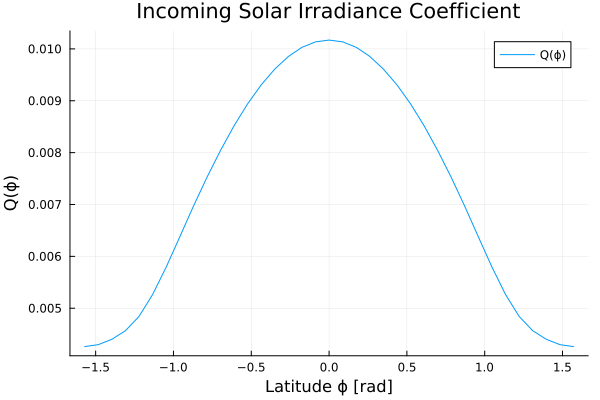

In [7]:
plot(p.ϕ, p.Q, title="Incoming Solar Irradiance Coefficient", xlabel="Latitude ϕ [rad]", ylabel="Q(ϕ)",label="Q(ϕ)")

* The form of the albedo is emperically found: 

$$\begin{align}\alpha(x,T) = \left\{b(x) - c_1[T_m + \min(T - c_2 z(x) - T_m,0)]\right\}_c\\
&\text{with}\quad \{ x \}_c = \begin{cases} 0.25\quad\text{if } x<= 0.25\\ 
x\quad\text{if }0.25<x<0.65\\   0.65\quad\text{if } x>= 0.65 \end{cases}  \end{align}$$

* It's temperature dependency is quite similar to the `tanh`-based formula we used for the 0d model, though.
* It is bound by the cutoff function $\{ x \}_c$ to be at least $0.25$ (so a completely icefree Earth) but at maximum $0.65$ (a completely frozen over Earth). 
* Ghil and Sellers used a maximum of $0.85$, Bodai et al reported that $0.65$ leads to results that are more in line with more comprehensive models 

In [8]:
"""
    α(T,p::ContinousGhilSellersParameters)

Albedo at discretized coordinate `x` and temperature `T`. Albedo is cutoff at minimum 0.25 and maximum α_max
"""
α(T,p::ContinousGhilSellersParameters) = cutoff_function.(p.b - p.c_1 .* (p.T_m .+ min.(0, T - p.c_2 .* p.z .- p.T_m)), p.α_max)


function cutoff_function(x, max_val) 
    if x <= 0.25
        return 0.25
    elseif x >= max_val
        return max_val
    else 
        return x
    end 
end

cutoff_function (generic function with 1 method)

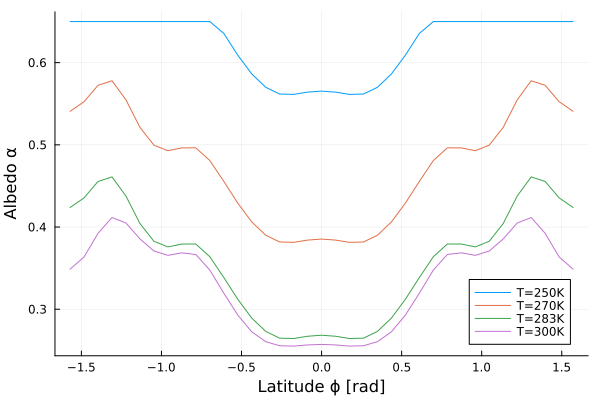

In [9]:
plot(p.ϕ, α(250 .*ones(p.g.N),p), label="T=250K", xlabel="Latitude ϕ [rad]", ylabel="Albedo α")
plot!(p.ϕ, α(270 .*ones(p.g.N),p), label="T=270K")
plot!(p.ϕ, α(283 .*ones(p.g.N),p), label="T=283K")
plot!(p.ϕ, α(300 .*ones(p.g.N),p), label="T=300K")

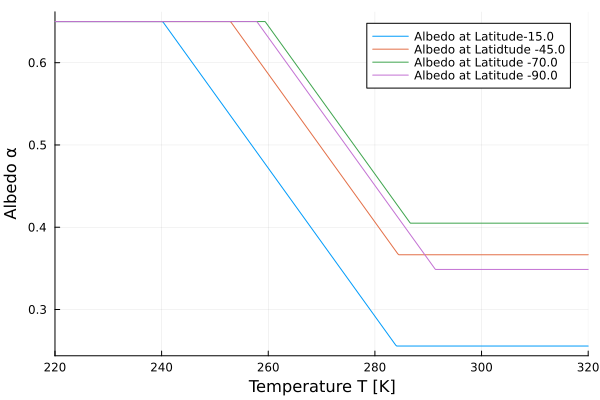

In [10]:
plot(T -> α(T.*ones(p.g.N),p)[16], xlims=[220,320], xlabel="Temperature T [K]", ylabel="Albedo α", label=string("Albedo at Latitude",(p.ϕ .* 180/π)[16]))
plot!(T -> α(T.*ones(p.g.N),p)[10], label=string("Albedo at Latidtude ",(p.ϕ .* 180/π)[10]))
plot!(T -> α(T.*ones(p.g.N),p)[5], label=string("Albedo at Latitude ",(p.ϕ .* 180/π)[5]))
plot!(T -> α(T.*ones(p.g.N),p)[1], label=string("Albedo at Latitude ",(p.ϕ .* 180/π)[1]))

# Outgoing Radiation 

* The outgoing radiation follows Stefan-Boltzmann law 
* A temperature dependend emissivity coefficient is introduced that reduces the outgoing radiation when temperature increases as greenhouse gases increase

$$\begin{align}
R_o(T) = \sigma c(T) T^4\end{align}$$

In [11]:
"""
    R_o(T,p::ContinousGhilSellersParameters)

Outgoing radiation according to Stefan-Boltzmann law with emissivity reduced to account for greenhouse gases
"""
R_o(T,p::ContinousGhilSellersParameters) = p.σ .* T.^4 .* c(T,p)  

"""
    c(T,p::ContinousGhilSellersParameters)

Emissivity coefficient accounting for greenhouse gases
"""
c(T,p::ContinousGhilSellersParameters) = 1 .- p.m .* tanh.(p.c_3 .* T.^6)

c

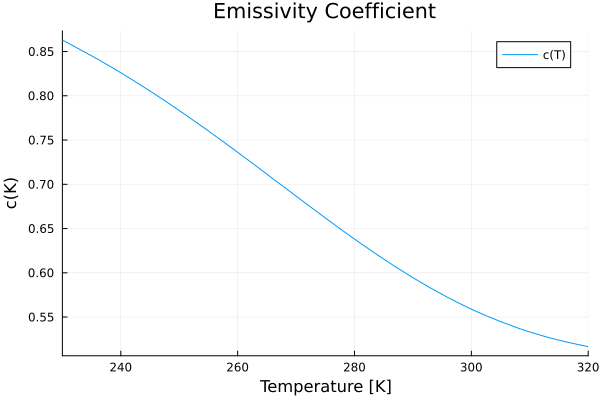

In [12]:
plot(T -> c(T,p), xlims=[230,320], title="Emissivity Coefficient", xlabel="Temperature [K]", ylabel="c(K)", label="c(T)")

### Diffusion 

* The diffusion is similar to the heat equation from last time, but with a temperature and latitude dependend diffusivity coefficient $k(x,T)$ that is estimated as different contribution to the heat flux
* We also have to accomodate for the spherical geometry with additional factors $cos(\phi)$ 

$$\begin{align} 
D(x,T) = \left(\frac{2}{\pi}\right)^2 \frac{1}{\cos(\phi(x))}\frac{\partial}{\partial x}\left(\cos(\phi(x))k(x,T) \frac{\partial T}{\partial x}\right)
\end{align}$$

* The challenge is now to also take care of the boundary conditions

#### Boundary Conditions

For the diffusion we have to make sure that the Neumann boundary conditions are fullfilled: 

$$ \frac{\partial T}{\partial x}(-1,t) = 0\quad \frac{\partial T}{\partial x}(1,t) = 0 \quad\forall t$$ 

For this purpose we have to rewrite the equation a bit, with $A(x)= ((2/π)^2) * (1 /\cos(ϕ(x)))$ and $B(x,T)=\cos(\phi(x)) k(x,T)$

$$\begin{align}
\frac{\partial T}{\partial t} &= R_i(x,T) - R_o(x,T) + A \frac{\partial}{\partial x}\left( B(x,T) \frac{\partial}{\partial x}T\right) \\
&= R_i(x,T) - R_o(x,T) + A \frac{\partial B}{\partial x}\frac{\partial T}{\partial x} + AB \frac{\partial^2 T}{\partial x^2} \\ 
\end{align}$$

Now, we only the only derivatives with respect to $x$ in the equation are $\frac{\partial T}{\partial x}$. So, we can look at the boundary condition: 

$$\begin{align} \frac{\partial T}{\partial x}(-1,t) &= 0 \\
\frac{T_2 - T_0}{2\Delta x} &= 0\quad\rightarrow\quad T_2 = T_0 \end{align}$$

Let's plug that into the equations above, to get the dynamics for the boundary points: 

$$\begin{align}\frac{\partial T_1}{\partial t} &= R_i(T_1) - R_o(T_1) + A \frac{\partial B}{\partial x} \left(\frac{T_2 - T_0}{2\Delta x}\right) + AB\frac{T_2 - 2T_1 + T_0}{\Delta x^2} \\
&= R_i(T_1) - R_o(T_1) + 2AB\frac{T_2 - T_1}{\Delta x^2}\\ 
\frac{\partial T_N}{\partial t} &= R_i(T_N) - R_o(T_N) + 2AB\frac{T_{N-1} - T_N}{\Delta x^2}\end{align}$$

In [13]:
"""
    k(T,p::ContinousGhilSellersParameters)

Heat flux, first term sensible heat flux, second term latent heat flux
"""
k(T,p::ContinousGhilSellersParameters) = p.k_1 + p.k_2 .* g(T,p)
k(T,i::Integer,p::ContinousGhilSellersParameters) = p.k_1[i] + p.k_2[i] * g(T,p)

"""
    g(T,p::ContinousGhilSellersParameters)

Latent heat flux contribution
"""
g(T,p::ContinousGhilSellersParameters) = p.c_4 .* exp.(-p.c_5 ./ T) ./ (T.^2)


"""
    D(T,p::ContinousGhilSellersParameters)  

1D Diffusion with Neumann boundary conditions applied
"""
function D(T,p::ContinousGhilSellersParameters)  
    A = ((2/π)^2) .* (1 ./ cos.(p.ϕ))
    
    D = A .* p.∂ₓ( cos.(p.ϕ) .* k(T,p) .* p.∂ₓ(T))
    D[1] = 2 * A[1] * cos(p.ϕ[1]) * k(T[1],1,p) * (T[2] - T[1])/(p.g.Δx^2)
    D[end] = 2 * A[end] * cos(p.ϕ[end]) * k(T[end],p.g.N,p) * (T[end-1] - T[end])/(p.g.Δx^2)

    return D
end

D

### Putting Everything Together 

* We now have everything for the model!
* Time is in [s], so the `tspan` has to be very, very large
* Let's put it together and integrate a first trajectory 

$$\begin{align} 
\frac{\partial T}{\partial t} &= (R_{i}(x,T) - R_{o}(x,T) + D(x,T,\partial T/\partial x, \partial^2 T/\partial x^2))/C(x)
\end{align}$$ 

In [14]:
"""
    ghilsellers_ebm!(du,u,p,t)   

RHS of the PDE, to be used with `DifferentialEquations.jl`
"""
function ghilsellers_ebm!(du,u,p,t)   
    du .= (R_i(u,p) - R_o(u,p) + D(u,p)) ./ p.C  
end
tspan = (0.,1e8)
prob = ODEProblem(ghilsellers_ebm!, 280*ones(p.g.N), tspan, p);

In [15]:
sol = solve(prob);

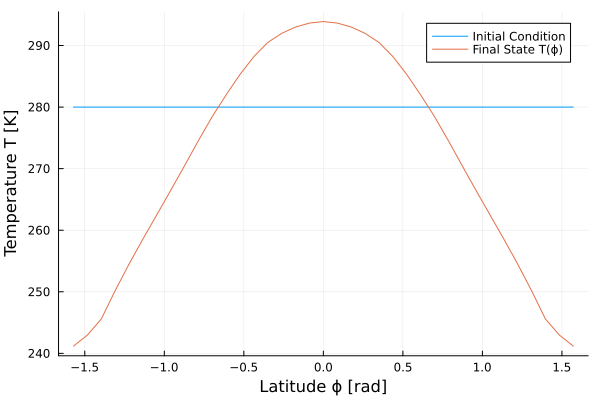

In [16]:
plot(p.ϕ, 280*ones(p.g.N), label="Initial Condition")
plot!(p.ϕ, sol(tspan[2]), label="Final State T(ϕ)", xlabel="Latitude ϕ [rad]", ylabel="Temperature T [K]")

In [17]:
t_plot = range(tspan[1],tspan[2],length=200)
ϕ = p.ϕ

T_plot = zeros(p.g.N, length(t_plot))
for (it,t) ∈ enumerate(t_plot)
    T_plot[:,it] = sol(t)
end

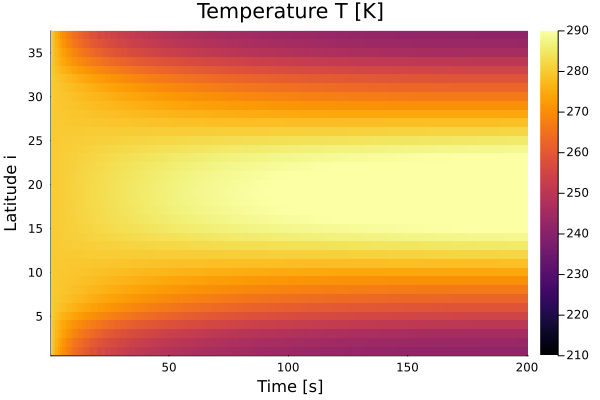

In [18]:
heatmap(T_plot, ylabel="Latitude i", xlabel="Time [s]", title="Temperature T [K]",clims=(210,290))

Let's also find the cold state

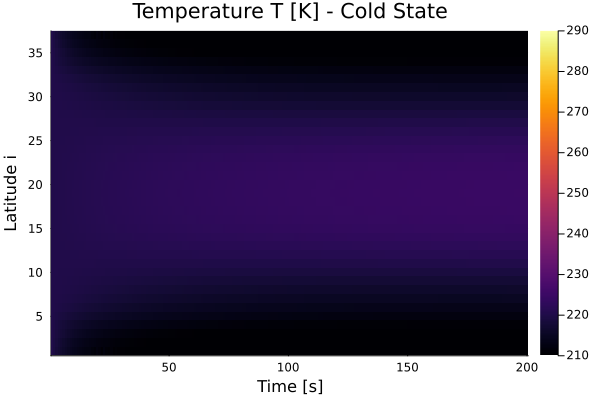

In [19]:
sol_cold = solve(remake(prob,u0=220*ones(p.g.N),tspan=(0.,1e9)));

T_plot_cold = zeros(p.g.N, length(t_plot))
for (it,t) ∈ enumerate(t_plot)
    T_plot_cold[:,it] = sol_cold(t)
end

heatmap(T_plot_cold, ylabel="Latitude i", xlabel="Time [s]", title="Temperature T [K] - Cold State", clims=(210,290))

[ Info: Saved animation to /Users/max/Nextcloud/TUM-Dynamics-Lecture/lectures/lecture-9/ebm-anim.gif


Plots.AnimatedGif("/Users/max/Nextcloud/TUM-Dynamics-Lecture/lectures/lecture-9/ebm-anim.gif")
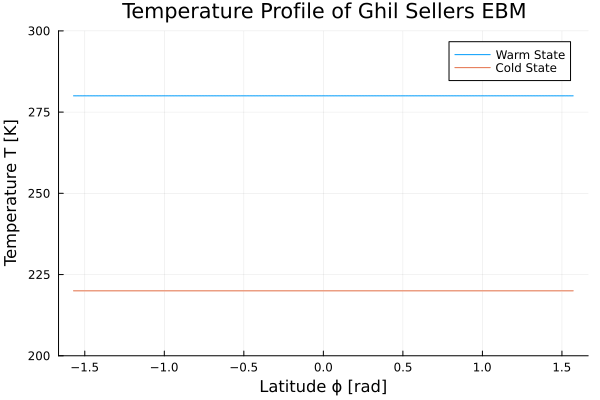

In [20]:
anim = @animate for it ∈ t_plot
    plot(p.ϕ, sol(it), xlabel="Latitude ϕ [rad]", label="Warm State", ylims=[210,300], ylabel="Temperature T [K]", title="Temperature Profile of Ghil Sellers EBM")
    plot!(p.ϕ, sol_cold(it), label="Cold State", ylims=[200,300])
end 
gif(anim, "ebm-anim.gif", fps=10)

[ Info: Saved animation to /Users/max/Nextcloud/TUM-Dynamics-Lecture/lectures/lecture-9/ebm-anim.gif


Plots.AnimatedGif("/Users/max/Nextcloud/TUM-Dynamics-Lecture/lectures/lecture-9/ebm-anim.gif")
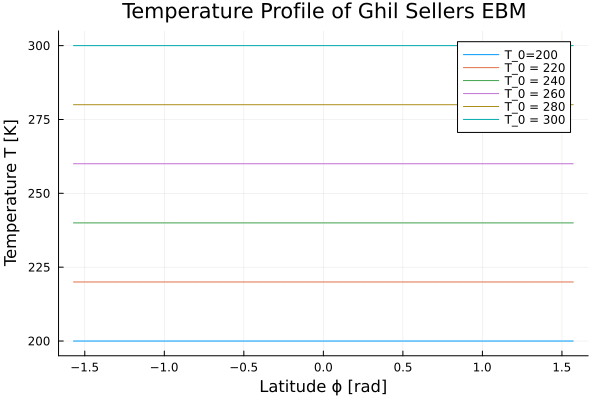

In [21]:
tspan = (0.,1e9)
sol_1 = solve(remake(prob,u0=200*ones(p.g.N),tspan=tspan));
sol_2 = solve(remake(prob,u0=220*ones(p.g.N),tspan=tspan));
sol_3 = solve(remake(prob,u0=240*ones(p.g.N),tspan=tspan));
sol_4 = solve(remake(prob,u0=260*ones(p.g.N),tspan=tspan));
sol_5 = solve(remake(prob,u0=280*ones(p.g.N),tspan=tspan));
sol_6 = solve(remake(prob,u0=300*ones(p.g.N),tspan=tspan));

t_plot = range(tspan[1],tspan[2],length=1000)

anim = @animate for it ∈ t_plot
    plot(p.ϕ, sol_1(it), xlabel="Latitude ϕ [rad]", label="T_0=200", ylims=[195,305], ylabel="Temperature T [K]", title="Temperature Profile of Ghil Sellers EBM")
    plot!(p.ϕ, sol_2(it), label="T_0 = 220")
    plot!(p.ϕ, sol_3(it), label="T_0 = 240")
    plot!(p.ϕ, sol_4(it), label="T_0 = 260")
    plot!(p.ϕ, sol_5(it), label="T_0 = 280")
    plot!(p.ϕ, sol_6(it), label="T_0 = 300")
end 
gif(anim, "ebm-anim.gif", fps=10)